In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read housing data set csv into memory
data=pd.read_csv("data/Boston_housing_data.csv",low_memory='False')

In [3]:
# Upper case all data frame column names
data.columns=map(str.upper, data.columns)

#check dimensions of data set
(rows,features)= data.shape
print "Number of rows in data set - ", rows
print "Number of features in data set - ",features
data.head(10)

Number of rows in data set -  506
Number of features in data set -  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


 Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [4]:
print data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')


In [5]:
# As part of my research, I'm interested in seeing the correlation between MEDV and 
# proximity from schools, employment centres 
# Pollution levels and social status
'''
Output variable
-----------------
MDEV     Median value of owner-occupied homes in $1000's

Features I'm interested in : 
==============================================================

NOX       nitric oxides concentration (parts per 10 million)
RAD       index of accessibility to radial highways
CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
DIS       weighted distances to five Boston employment centres
PTRATIO  pupil-teacher ratio by town
LSTAT    % lower status of the population
==============================================================

Features which directly impact house value:
------------------------------------------------
RM        average number of rooms per dwelling
AGE       proportion of owner-occupied units built prior to 1940


'''

data = data [["MEDV","NOX","RAD","CHAS","DIS","PTRATIO","LSTAT","RM","AGE"]]

print " current data set dimensions", data.shape

 current data set dimensions (506, 9)


In [6]:
# RAD is an index of accessibility to radial highways 
# This captures locational advantages besides nearness to workplace
# This should positively impact house value

print "\n** Frequency ditribution of RAD feature **" 
print data["RAD"].value_counts(dropna='False').sort_index()
print "Percentages for RAD"
data["RAD"].value_counts(normalize='True',dropna='False').sort_index()


** Frequency ditribution of RAD feature **
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: RAD, dtype: int64
Percentages for RAD


1     0.039526
2     0.047431
3     0.075099
4     0.217391
5     0.227273
6     0.051383
7     0.033597
8     0.047431
24    0.260870
Name: RAD, dtype: float64

In [7]:
# CHAS indicates if tract is bound by Charles River or not
# It is expected that places surrounded by rivers have higher house value

print "\n** Frequency ditribution of CHAS feature **" 
print data["CHAS"].value_counts(dropna='False').sort_index()
print "Percentages for CHAS"
data["CHAS"].value_counts(normalize='True',dropna='False').sort_index()



** Frequency ditribution of CHAS feature **
0    471
1     35
Name: CHAS, dtype: int64
Percentages for CHAS


0    0.93083
1    0.06917
Name: CHAS, dtype: float64

In [8]:
# RM indicates average number of rooms per dwelling
# RM should have positive correlation with  higher house value

data["RM_ABS"]=[int(round(x)) for x in data["RM"]]
print "\n** Frequency ditribution of RM_ABS feature **" 
print data["RM_ABS"].value_counts(dropna='False').sort_index()
print "Percentages for RM_ABS"
data["RM_ABS"].value_counts(normalize='True',dropna='False').sort_index()


** Frequency ditribution of RM_ABS feature **
4      5
5     37
6    312
7    125
8     24
9      3
Name: RM_ABS, dtype: int64
Percentages for RM_ABS


4    0.009881
5    0.073123
6    0.616601
7    0.247036
8    0.047431
9    0.005929
Name: RM_ABS, dtype: float64


** Frequency ditribution of PT_RATIO_ABS derived feature **
13     15
14      2
15     58
16     21
17     48
18     70
19     75
20    161
21     54
22      2
Name: PTRATIO_ABS, dtype: int64
Percentages for PTRATIO_ABS


13    0.029644
14    0.003953
15    0.114625
16    0.041502
17    0.094862
18    0.138340
19    0.148221
20    0.318182
21    0.106719
22    0.003953
Name: PTRATIO_ABS, dtype: float64

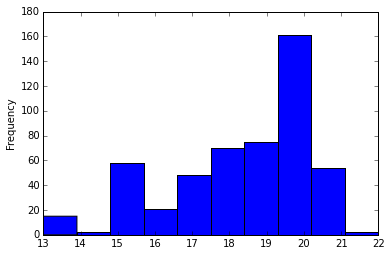

In [16]:
# PTRATIO refers to pupil - Teacher ratio . The lower it is, the better education is.
# i.e. parents who can afford, prefer lower PTRATIO 
# and hence houses in such areas might be expensive

# Convert PTRATIO to integer values and save to PTRATIO_ABS 
data["PTRATIO_ABS"]=[int(round(x)) for x in data["PTRATIO"]]
data["PTRATIO_ABS"].plot.hist()
print "\n** Frequency ditribution of PT_RATIO_ABS derived feature **" 
print data["PTRATIO_ABS"].value_counts(dropna='False').sort_index()
print "Percentages for PTRATIO_ABS"
data["PTRATIO_ABS"].value_counts(normalize='True',dropna='False').sort_index()